In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
train_data = pd.read_csv("/content/Titanic-Dataset.csv")

# Preview dataset
print(train_data.head())
print("\n")

print(train_data.info())
print("\n")

print(train_data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [4]:
# Select features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]
y = train_data["Survived"]

# Handle missing values
X.loc[:, "Age"] = X["Age"].fillna(X["Age"].median())
X.loc[:, "Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])


# Encode categorical variables
le = LabelEncoder()
X.loc[:, "Sex"] = le.fit_transform(X["Sex"])
X.loc[:, "Embarked"] = le.fit_transform(X["Embarked"])



In [5]:
# Training the model

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



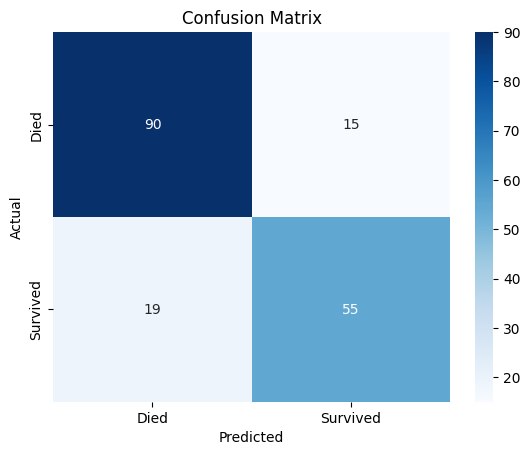

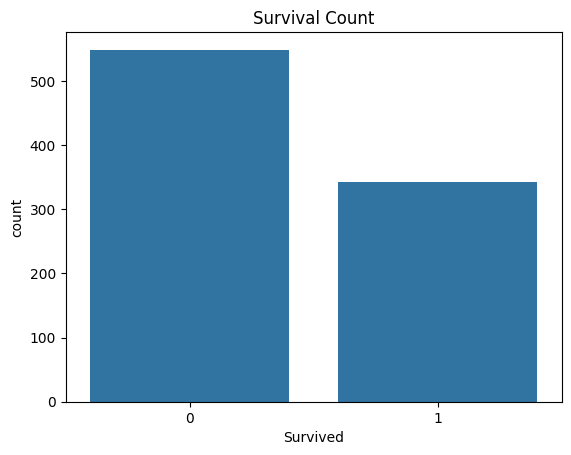

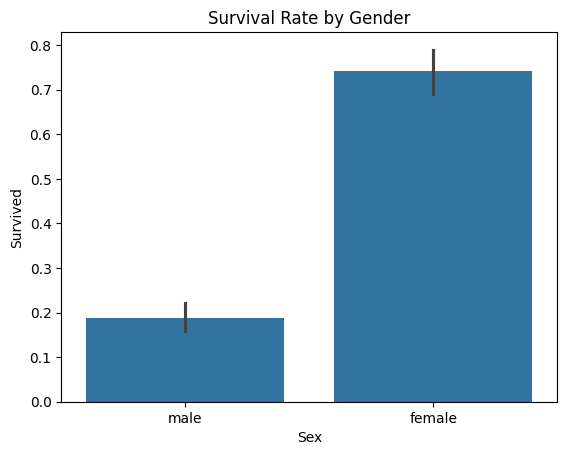

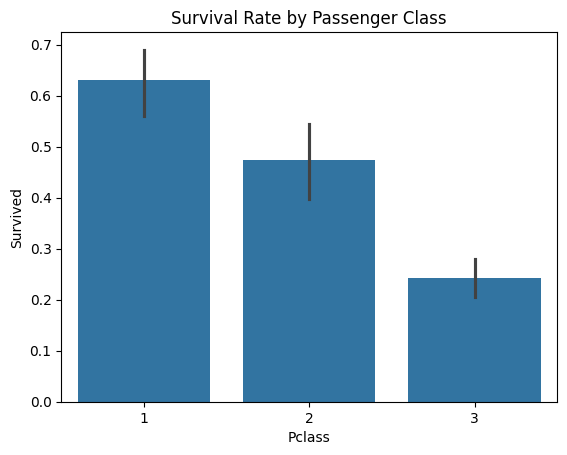

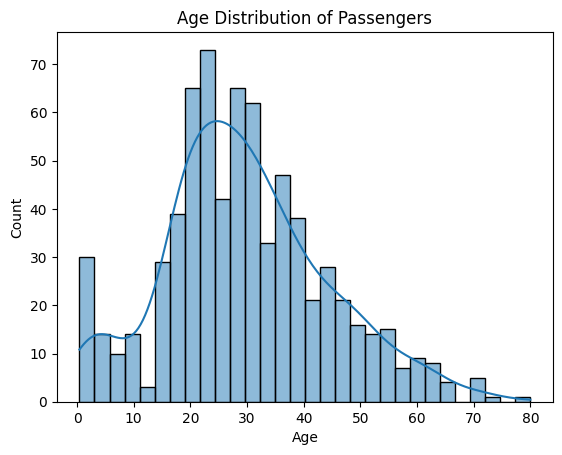

In [6]:

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Insights visualization
sns.countplot(x="Survived", data=train_data)
plt.title("Survival Count")
plt.show()

sns.barplot(x="Sex", y="Survived", data=train_data)
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.histplot(train_data["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()
